### БИБЛИОТЕКА АЛГОРИТМОВ МАШИННОГО ОБУЧЕНИЯ ***SCIKIT-LEARN***

In [1]:
# ИМПОРТИРУЕМ БАЗОВЫЕ БИБЛИОТЕКИ

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ИМПОРТИРУЕМ БИБЛИОТЕКИ ДЛЯ ОСУЩЕСТВЛЕНИЯ МАШИННОГО ОБУЧЕНИЯ

from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

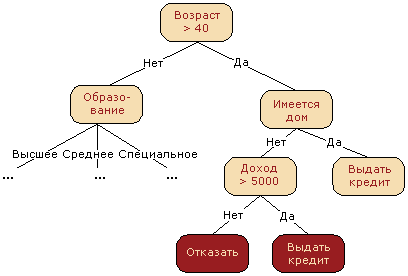

In [3]:
# ПРИМЕР ЛОГИКИ РАБОТЫ ДЕРЕВА РЕШЕНИЙ
import PIL
# from PIL import Image
PIL.Image.open("picture_decision_tree.gif")

In [4]:
# ЗАГРУЖАЕМ ФАЙЛ

df = pd.read_csv('health.csv', index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# ПОЛУЧАЕМ ИНФОРМАЦИЮ О НАБОРЕ ДАННЫХ

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [6]:
# ПЕРЕВОДИМ ПОКАЗАТЕЛЬ ВОЗРАСТА ИЗ ДНЕЙ В ГОДЫ

df['age_years'] = (df.age / 365.25).astype('int')

In [7]:
# ПРЕДСТАВЛЯЕМ НЕКОТОРЫЕ КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ В ВИДЕ НАБОРА ФИКТИВНЫХ ПЕРЕМЕННЫХ

train_df = pd.get_dummies(df, columns=['cholesterol', 
                                       'gluc']).drop(['age','cardio'],
                                                     axis=1)
target = df.cardio

In [8]:
train_df.head()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0,0,1,50,1,0,0,1,0,0
1,1,156,85.0,140,90,0,0,1,55,0,0,1,1,0,0
2,1,165,64.0,130,70,0,0,0,51,0,0,1,1,0,0
3,2,169,82.0,150,100,0,0,1,48,1,0,0,1,0,0
4,1,156,56.0,100,60,0,0,0,47,1,0,0,1,0,0


##### СТРОИМ КЛАССИФИКАТОР НА ОСНОВЕ АЛГОРИТМА ДЕРЕВА РЕШЕНИЙ

In [9]:
# ДЕЛИМ НАБОР ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ 
# (КАК ПО ФАКТОРАМ, ТАК И ПО РЕЗУЛЬТАТИВНОЙ ПЕРЕМЕННОЙ)

X_train, X_valid, y_train, y_valid = train_test_split(train_df.values, target.values,
                                                     test_size=.3, random_state=17)

In [10]:
# СОЗДАЕМ ЭКЗЕМПЛЯР КЛАССИФИКАТОРА "ДЕРЕВО РЕШЕНИЙ" И ОБУЧАЕМ ЕГО

tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, 
                                                                y_train)

In [1]:
# СМОТРИМ ГРАФИК ПОЛУЧИВШЕГОСЯ ДЕРЕВА РЕШЕНИЙ

# dot_data = StringIO()
# export_graphviz(tree, feature_names=train_df.columns, 
#                 out_file=dot_data, filled=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(value=graph.create_png())

<img src=tree_plot.png>

In [12]:
# ОСУЩЕСТВЛЯЕМ ПРОГНОЗ (ПРЕДСКАЗАНИЕ) НА ДАННЫХ ТЕСТОВОЙ ВЫБОРКИ

tree_pred_valid = tree.predict(X_valid)

In [13]:
# ОЦЕНИВАЕМ КАЧЕСТВО ПРОГНОЗА НА ОСНОВЕ ПОКАЗАТЕЛЯ ACCURACY (ВЕРНОСТЬ), ОНА ОПРЕДЕЛЯЕТСЯ КАК
# ДОЛЯ ВЕРНО КЛАССИФИЦИРОВАННЫХ ЕДИНИЦ В ЦЕЛОМ ПО ВСЕЙ ТЕСТОВОЙ СОВОКУПНОСТИ 

tree_acc_valid = accuracy_score(y_valid, tree_pred_valid)
print('Accuracy: {acc:.3f}'.format(acc=tree_acc_valid))

Accuracy: 0.721


##### ПЫТАЕМСЯ УЛУЧШИТЬ КАЧЕСТВО МОДЕЛИ КЛАССИФИКАЦИИ

In [14]:
# ПРОИЗВОДИМ ПОДБОР ГИПЕРПАРАМЕТРА "ГЛУБИНА ДЕРЕВА" ПО СЕТКЕ ЗНАЧЕНИЙ (ОТ 2 ДО 7)
# И ОБУЧАЕМ ДАННЫЕ МЕТОДОМ КРОСС-ВАЛИДАЦИИ (РАЗБИВАЯ ДАННЫЕ НА 5 ГРУПП - Т.Н. "ФОЛДОВ")

# %%time
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=17), 
                         tree_params, 
                         cv=5, scoring='accuracy') 

tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

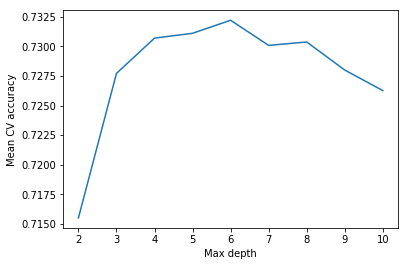

In [15]:
# СТРОИМ ГРАФИК ЗАВИСИМОСТИ ТОЧНОСТИ ПРЕДСКАЗАНИЯ ОТ ПОКАЗАТЕЛЯ ГЛУБИНЫ ДЕРЕВА РЕШЕНИЙ

plt.plot(tree_params['max_depth'], 
         tree_grid.cv_results_['mean_test_score'])
plt.xlabel('Max depth')
plt.ylabel('Mean CV accuracy');

In [16]:
# ПЕЧАТАЕМ ЛУЧШИЕ ЗНАЧЕНИЯ ПАРАМЕТРА И СООТВЕТСТУЮЩЕЕ ЕМУ ЗНАЧЕНИЕ ПОКАЗАТЕЛЯ ACCURACY,
# ПОЛУЧЕННЫЕ НА ОБУЧАЮЩЕЙ ВЫБОРКЕ

print("Best params:", tree_grid.best_params_)
print("Best cross validaton score", tree_grid.best_score_)

Best params: {'max_depth': 6}
Best cross validaton score 0.732204081632653


In [17]:
# ТЕСТИРУЕМ ПОЛУЧЕННУЮ МОДЕЛЬ И СЧИТАЕМ ПОКАЗАТЕЛЬ ACCURACY

tuned_tree_acc_valid = accuracy_score(y_valid, 
                                      tree_grid.predict(X_valid))
print('Accuracy {acc:.3f}'.format(acc=tuned_tree_acc_valid))

Accuracy 0.726


In [18]:
# ВЫЯСНЯЕМ, КАК ИЗМЕНИЛОСЬ ЗНАЧЕНИЕ ПОКАЗАТЕЛЯ ACCURACY

delta = (tuned_tree_acc_valid - tree_acc_valid) * 100
print(('Абсолютный прирост показателя Accuracy составляет {:.1f} п.п.').format(delta))
rate = (tuned_tree_acc_valid / tree_acc_valid - 1) * 100
print(('\nТемп прироста показателя Accuracy составляет {:.1f} %').format(rate))

Абсолютный прирост показателя Accuracy составляет 0.4 п.п.

Темп прироста показателя Accuracy составляет 0.6 %


##### ПРОРАНЖИРУЕМ ПРИЗНАКИ  ПО СТЕПЕНИ ИХ ВАЖНОСТИ ДЛЯ ОСУЩЕСТВЛЕНИЯ КЛАССИФИКАЦИИ

In [19]:
# СОЗДАДИМ ПОДНАБОР ИЗ ОБСЛЕДУЕМЫХ, ВХОДЯЩИХ В ЗОНУ РИСКА - ПОЛОЖИТЕЛЬНО ОТВЕТИВШИХ 
# НА ВОПРОС О КУРЕНИИ И ПОЭТОМУ ИМЕЮЩИХ НАИБОЛЬШУЮ ВЕРОЯТНОСТЬ НАЛИЧИЯ ССЗ

sub_df = pd.DataFrame(df.smoke.copy())
sub_df['male']  = df.gender - 1

# ОТБИРАЕМ ОТБИРАЕМ ИЗ  СОСТАВА КУРЯЩИХ ТЕМ, КТО В ВОЗРАСТЕ 45-65 ЛЕТ И ДЕЛИМ НА ВОЗРАСТНЫЕ ГРУППЫ 
sub_df['age_45_50'] = ((df.age_years >= 45) 
                       & (df.age_years < 50) ).astype('int')
sub_df['age_50_55'] = ((df.age_years >= 50) 
                       & (df.age_years < 55) ).astype('int')
sub_df['age_55_60'] = ((df.age_years >= 55) 
                       & (df.age_years < 60) ).astype('int')
sub_df['age_60_65'] = ((df.age_years >= 60) 
                       & (df.age_years < 65) ).astype('int')

# КРОМЕ ТОГО, ДЕЛИМ КУРЯЩИХ НА ГРУППЫ УРОВНЮ АРТЕРИАЛЬНОГО ДАВЛЕНИЯ 
sub_df['ap_hi_120_140'] = ((df.ap_hi >= 120) 
                           & (df.ap_hi < 140)).astype('int')
sub_df['ap_hi_140_160'] = ((df.ap_hi >= 140) 
                           & (df.ap_hi < 160)).astype('int')
sub_df['ap_hi_160_180'] = ((df.ap_hi >= 160) 
                           & (df.ap_hi < 180)).astype('int')

# НАКОНЕЦ, ПОДРАЗДЕЛЯЕМ КУРЯЩИХ НА ГРУППЫ ПО УРОВНЮ ХОЛЕСТЕРИНА
sub_df['chol=1'] = (df.cholesterol == 1).astype('int')
sub_df['chol=2'] = (df.cholesterol == 2).astype('int')
sub_df['chol=3'] = (df.cholesterol == 3).astype('int')

In [20]:
# СМОТРИМ НА ПЕРВЫЕ СТРОКИ ПОЛУЧИВШЕГОСЯ НАБОРА ДАННЫХ

sub_df.head()

,smoke,male,age_45_50,age_50_55,age_55_60,age_60_65,ap_hi_120_140,ap_hi_140_160,ap_hi_160_180,chol=1,chol=2,chol=3
id,,,,,,,,,,,,
0,0,1,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,1,0,0,0,1
2,0,0,0,1,0,0,1,0,0,0,0,1
3,0,1,1,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [21]:
# СОЗДАЕМ ЕЩЕ ОДИН ЭКЗЕМПЛЯР КЛАССИФИКАТОРА НА ОСНОВЕ ДЕРЕВА РЕШЕНИЙ

tree = DecisionTreeClassifier(max_depth=3, 
                              random_state=17).fit(sub_df, target)

In [5]:
# СТРОИМ ГРАФИК ДЕРЕВА РЕШЕНИЙ И ВЫЯСНЯЕМ ПРИОРИТЕТ ПРИЗНАКОВ ПО ИХ ВАЖНОСТИ ДЛЯ КЛАССИФИКАТОРА

# dot_data = StringIO()
# export_graphviz(tree, feature_names=sub_df.columns, 
#                 out_file=dot_data, filled=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(value=graph.create_png())

<img src=tree_plot.png>

TO BE CONTINUED